In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


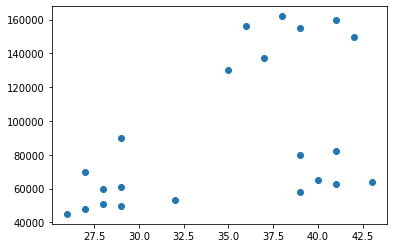

In [3]:
plt.scatter(df.Age,df['Income($)'])

In [4]:
scaler = MinMaxScaler()
scaler.fit_transform(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
# scaler.fit_transform(df[['Income($)']]) can directly fit_transform

In [5]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [6]:
km = KMeans(n_clusters = 3)
predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = predicted

In [7]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'Income')

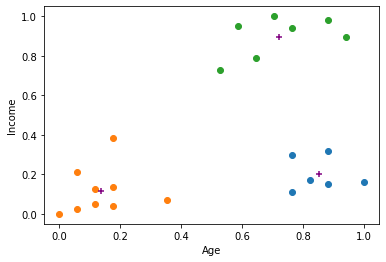

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'])
plt.scatter(df3.Age,df3['Income($)'])
plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1],color = 'purple' ,marker = '+')
plt.xlabel("Age")
plt.ylabel('Income')

Elbow Method

SSE = sum of square = km.inertia_

SSE means the u calculate the difference between in the cluster between the center point and the other point inside the cluster then u square it up, the lower sse the better performance u get

In [9]:
k_range = range(1,10)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    SSE.append(km.inertia_)

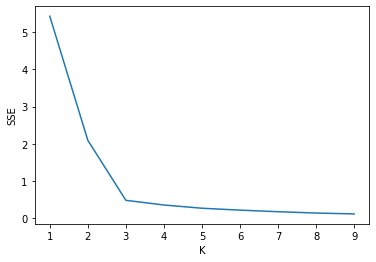

In [10]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,SSE)

Exercise

In [11]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
df = pd.DataFrame(iris.data , columns = iris.feature_names)
df.drop(columns = ['petal length (cm)' , 'petal width (cm)'],inplace = True)
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [13]:
scaler = MinMaxScaler()
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])
scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)'] = scaler.transform(df[['sepal width (cm)']])

In [14]:
k_range = range(1,10)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df)
    SSE.append(km.inertia_)

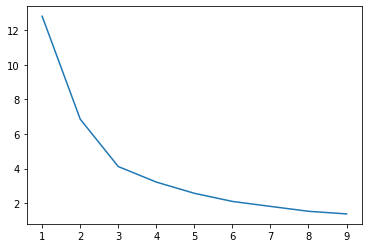

In [15]:
plt.plot(k_range,SSE)

In [16]:
km = KMeans(n_clusters = 3)
predicted = km.fit_predict(df)
df['clusters'] = predicted

In [17]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1]
df2 = df[df.clusters == 2]

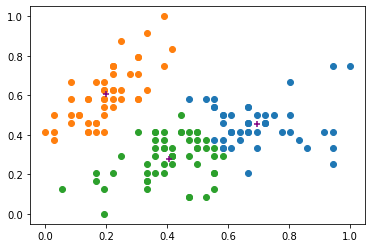

In [18]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1] , color = 'purple' , marker = '+')